# Janhavi Tawde
# Task 3 Exploratory Data Analysis - Retail
# The Sparks Foundation- Internship Jan 2021

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df= df.drop_duplicates()

In [6]:
df.shape

(9977, 13)

###### 14 rows were duplicate which were dropped.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [10]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
df['Country'].unique()

array(['United States'], dtype=object)

In [12]:
df['City'].value_counts()

New York City     914
Los Angeles       746
Philadelphia      536
San Francisco     506
Seattle           424
                 ... 
Manhattan           1
Jefferson City      1
Cheyenne            1
Kissimmee           1
Margate             1
Name: City, Length: 531, dtype: int64

In [13]:
df['City'].nunique()

531

In [14]:
df['State'].nunique()

49

In [16]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

In [17]:
df['Postal Code'].nunique()

631

In [18]:
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

In [19]:
df['Category'].nunique()

3

In [20]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [21]:
df['Sub-Category'].nunique()

17

In [22]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [23]:
df['Quantity'].value_counts()

3     2400
2     2399
5     1230
4     1186
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [24]:
df['Discount'].value_counts()

0.00    4787
0.20    3653
0.70     418
0.80     299
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

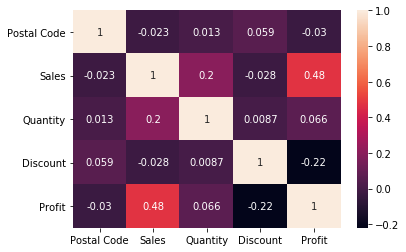

In [26]:
ax = sns.heatmap(df.corr(), annot=True,)

##### Conclusion
1. Sales and Profit are moderately correlated with each other.
2. Discount and profit are negatively correlated with each other.

# Analyzing Sales and Profit

## 1. By Ship Mode

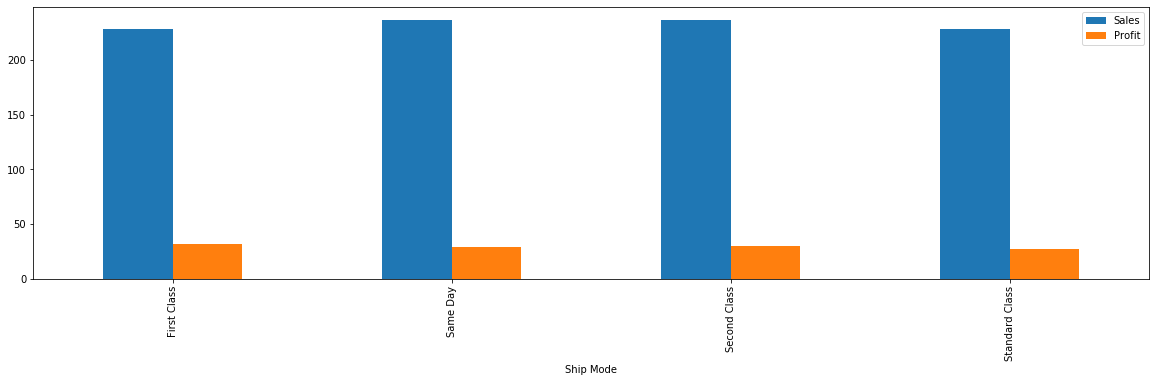

In [27]:
t=df[['Ship Mode','Sales','Profit']].groupby(['Ship Mode']).mean()
t.plot.bar(figsize=(20,5))

In [28]:
def avg_bar(column):
    profit = df['Profit'].groupby(df[column]).mean()
    plt.figure(figsize=(25,10))
    sns.barplot(profit.index, profit.values, palette='dark')
    plt.grid()
    plt.title('Average Profit - per {}'.format(column), fontsize=18)
    plt.ylabel('Profit', fontsize=16)
    plt.xlabel('{}'.format(column), fontsize=16)
    plt.show()

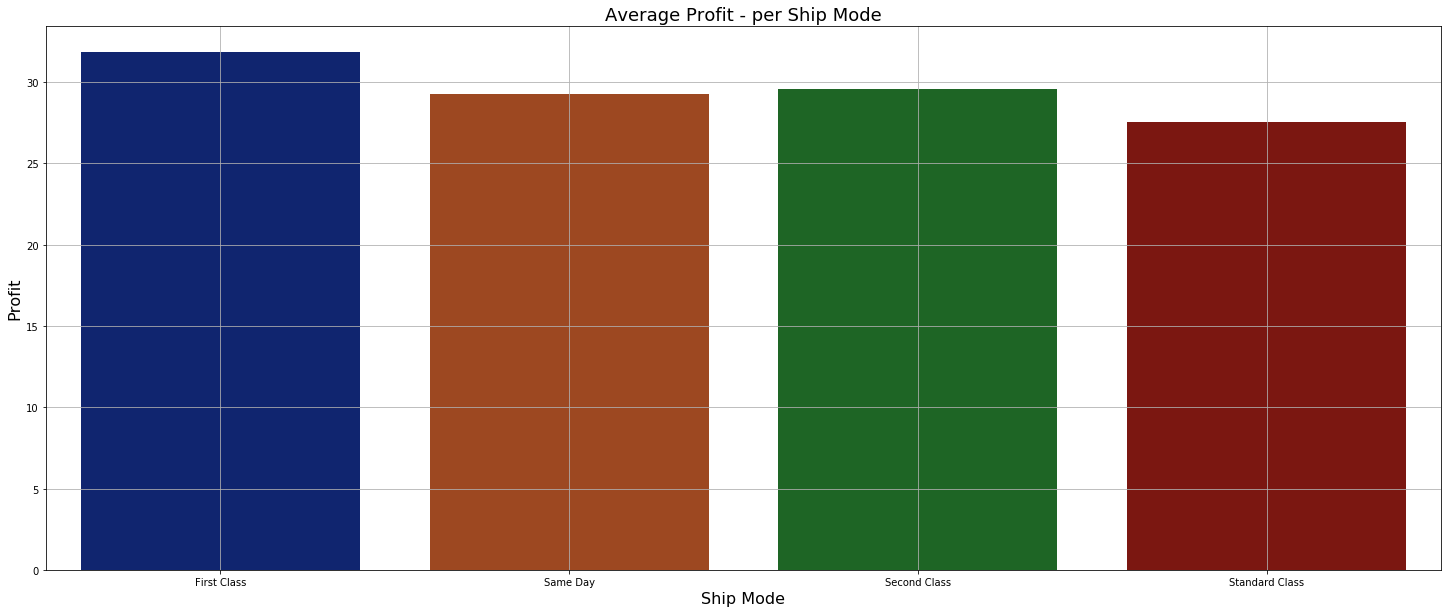

In [29]:
avg_bar('Ship Mode')

In [30]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie


<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)>

In [31]:
def pie_percentage(column):
    df1 = df.groupby([column])['Sales', 'Profit', 'Discount'].mean()
    df1.plot.pie(subplots=True, labels = df1.index, autopct='%1.2f%%',figsize = (20,20))

C:\jupyternotebook\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


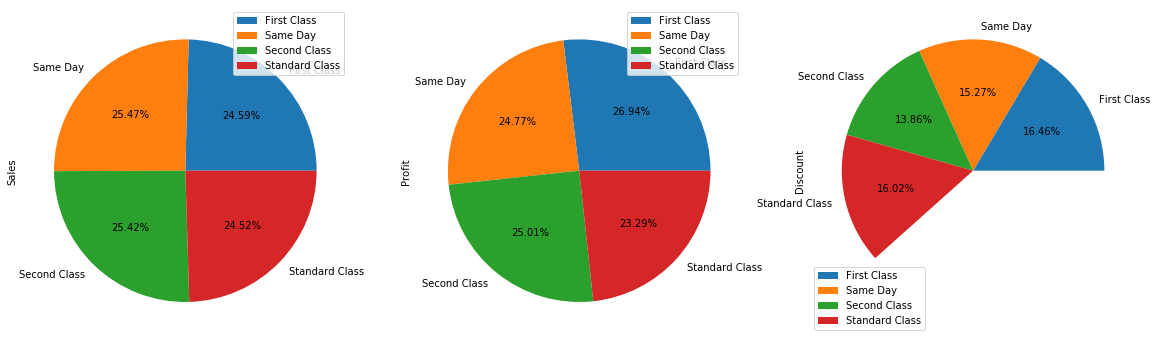

In [32]:
pie_percentage('Ship Mode')

In [71]:
df_ship = df.groupby(['Ship Mode'])['Sales', 'Profit', 'Discount'].mean()
df_ship

C:\jupyternotebook\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Profit,Discount
Ship Mode,,,
First Class,228.614490,31.850134,0.164587
Same Day,236.755950,29.283924,0.152675
Second Class,236.323750,29.565956,0.138626
Standard Class,227.928858,27.534715,0.160222


1. Sales is highest in Same Day.
2. Profit is highest in First class.
3. Discount is highest in first Class

## 2. By Segment

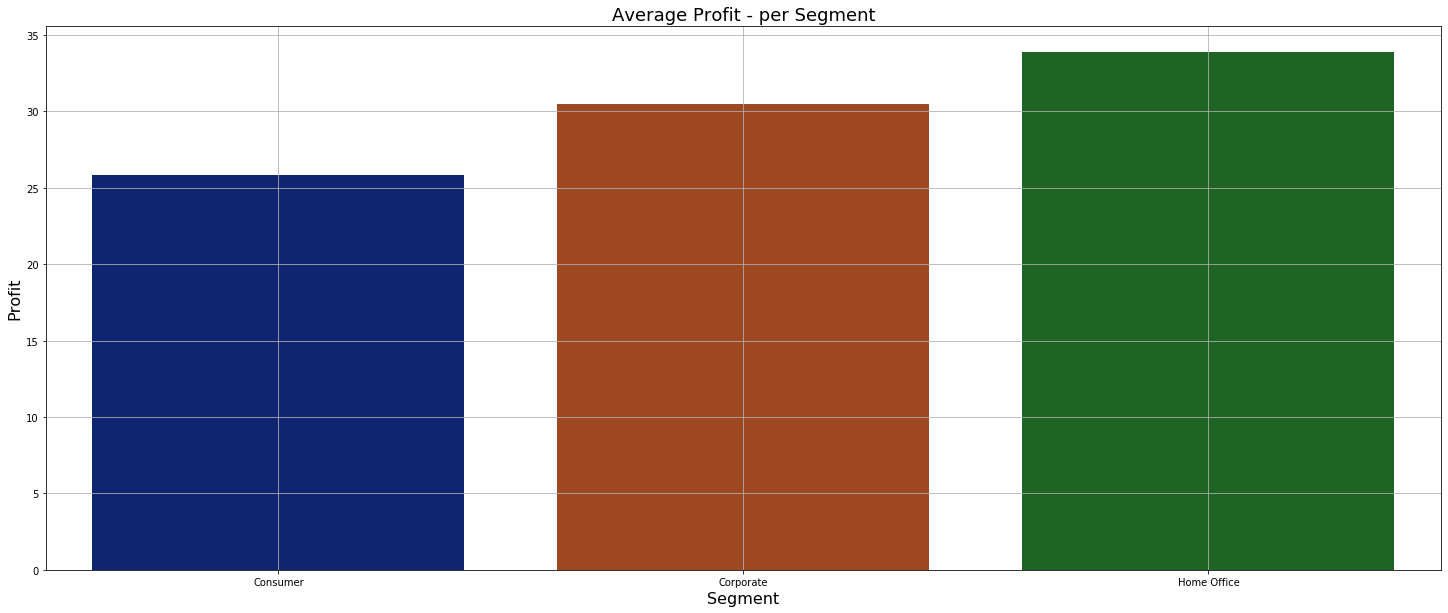

In [33]:
avg_bar('Segment')

C:\jupyternotebook\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


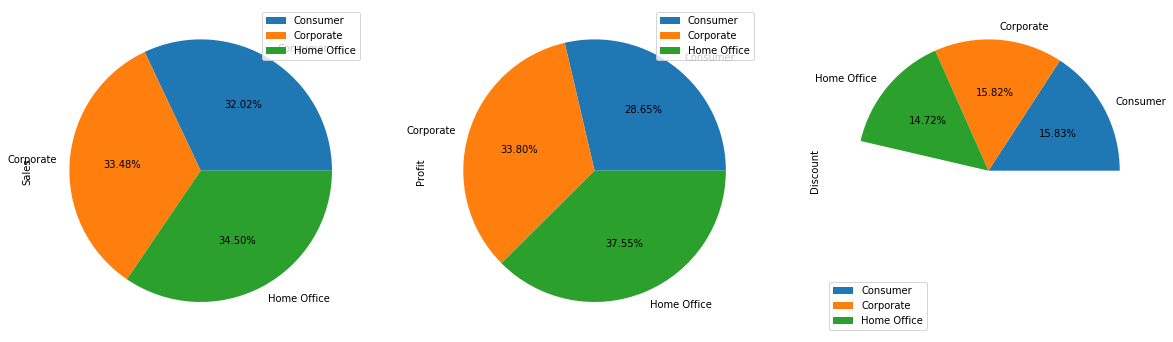

In [34]:
pie_percentage('Segment')

1. Avg. Sales is highest in Home Office and lowest in Consumer.
2. Avg. Profit is highest in Home Office and lowest in Consumer.
3. Avg. Discount is highest in Consumer and lowest in Home Office.

### Discount is given more to Consumer Segment which leads to low profit.

## 3. By City

In [35]:
df_city = df[['City','Profit']]
df_city = df_city.groupby('City')[['Profit']].mean()
df_city = df_city.sort_values('Profit', ascending = False)
df_city

,Profit
City,
Jamestown,642.885750
Independence,487.831500
Lafayette,323.173794
Minneapolis,296.721070
Appleton,277.383150
...,...
Lancaster,-157.371052
Round Rock,-169.061614
Oswego,-178.709200


Text(0.5, 1.0, 'City wise analysis of Profit')

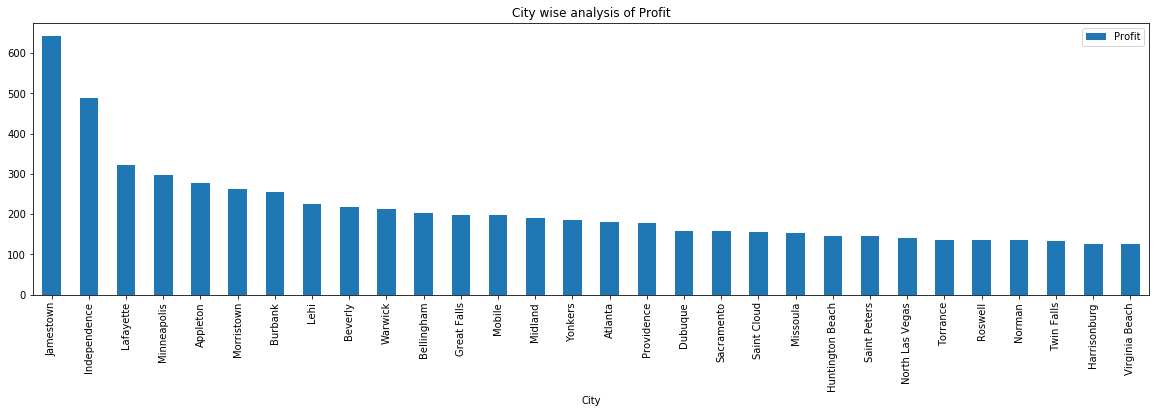

In [36]:
bar1=df_city.head(30)
bar1.plot(kind='bar',figsize=(20,5))
plt.title('City wise analysis of Profit')

Text(0.5, 1.0, 'City wise analysis of Profit')

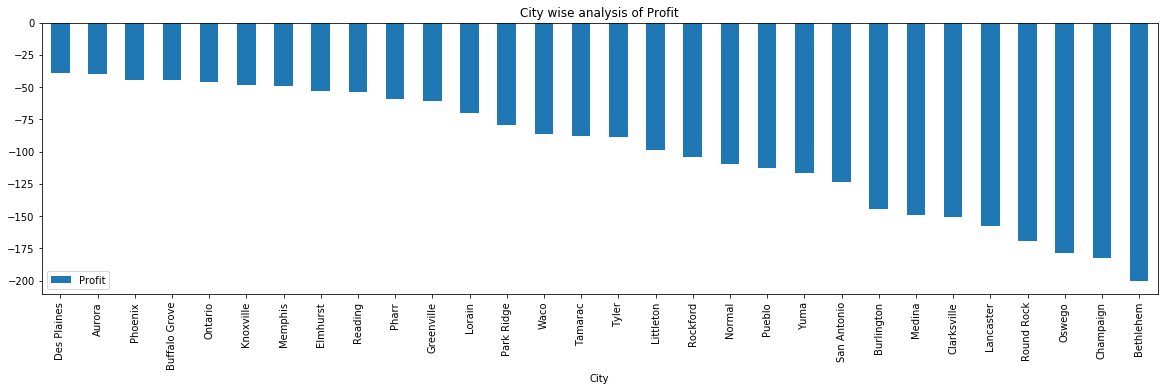

In [37]:
bar2=df_city.tail(30)
bar2.plot(kind='bar',figsize=(20,5))
plt.title('City wise analysis of Profit')

1. Jamestown has highest avg. Profit.
2. Bethlehem has lowest avg. Profit.

## 4. By State

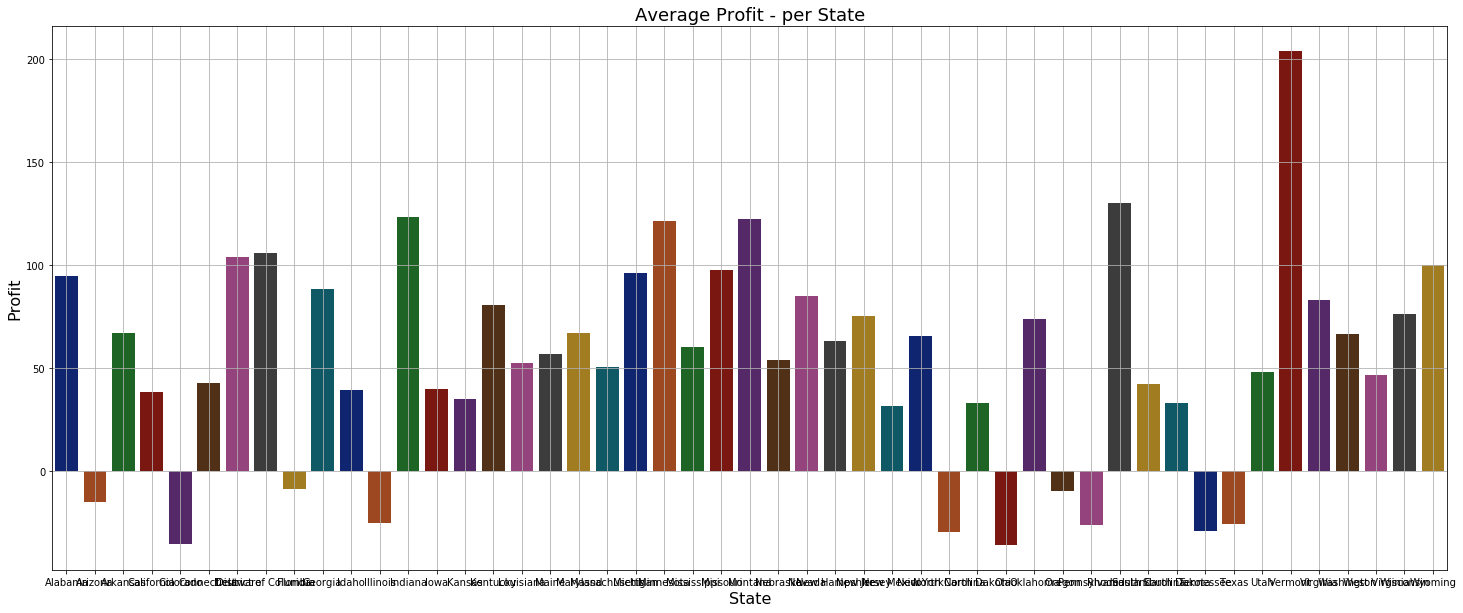

In [38]:
avg_bar('State')

In [39]:
df_state = df[['State','Profit']]
df_state = df_state.groupby('State')[['Profit']].mean()
df_state = df_state.sort_values('Profit', ascending = False)
df_state

,Profit
State,
Vermont,204.088936
Rhode Island,130.100523
Indiana,123.375411
Montana,122.221900
Minnesota,121.608847
District of Columbia,105.958930
Delaware,103.930988
Wyoming,100.196000
Missouri,97.518341


Text(0.5, 1.0, 'State wise analysis of Profit')

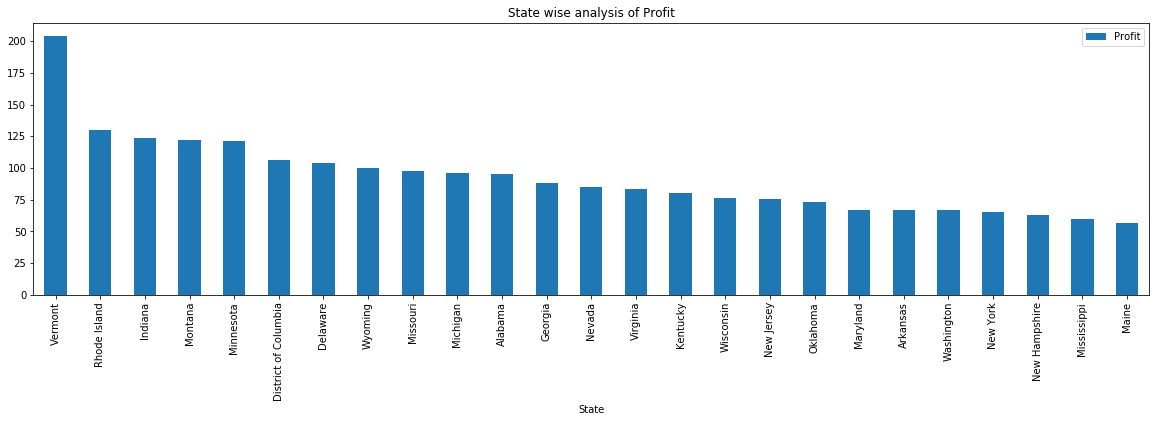

In [40]:
bar1=df_state.head(25)
bar1.plot(kind='bar',figsize=(20,5))
plt.title('State wise analysis of Profit')

Text(0.5, 1.0, 'State wise analysis of Profit')

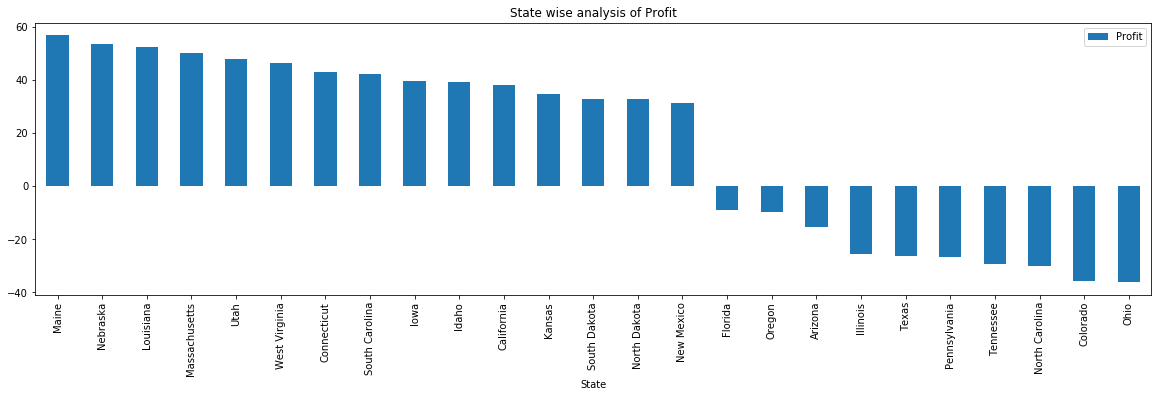

In [41]:
bar1=df_state.tail(25)
bar1.plot(kind='bar',figsize=(20,5))
plt.title('State wise analysis of Profit')

Ohio has lowest profit and Vermont has highest profit.

## 5. By Region

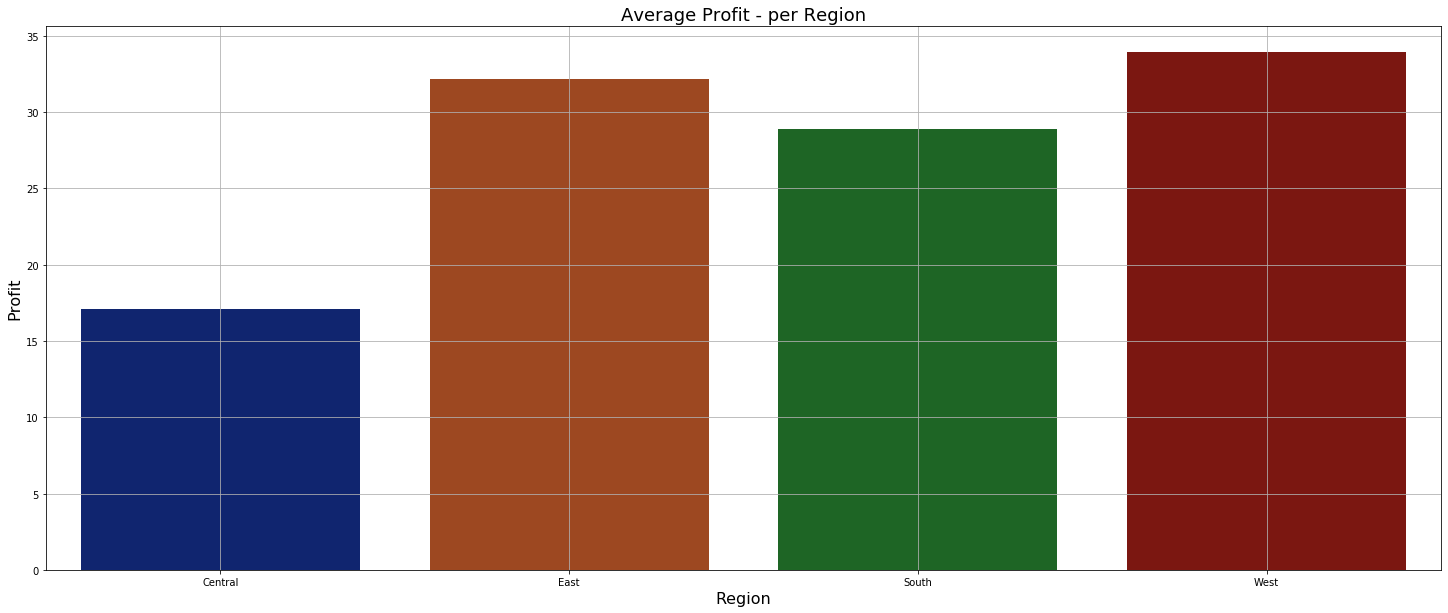

In [42]:
avg_bar('Region')

C:\jupyternotebook\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


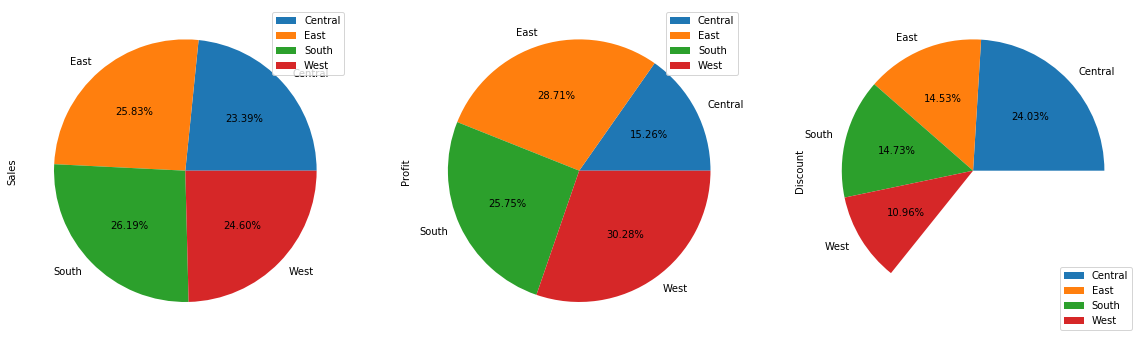

In [43]:
pie_percentage('Region')

1. Avg. Sales is highest in South Region and lowest in Central Region.
2. Avg. Profit is highest in West Region and lowest in Central Region.
3. Avg. Discount is highest in Central Region and lowest in West.

## 5. By Category

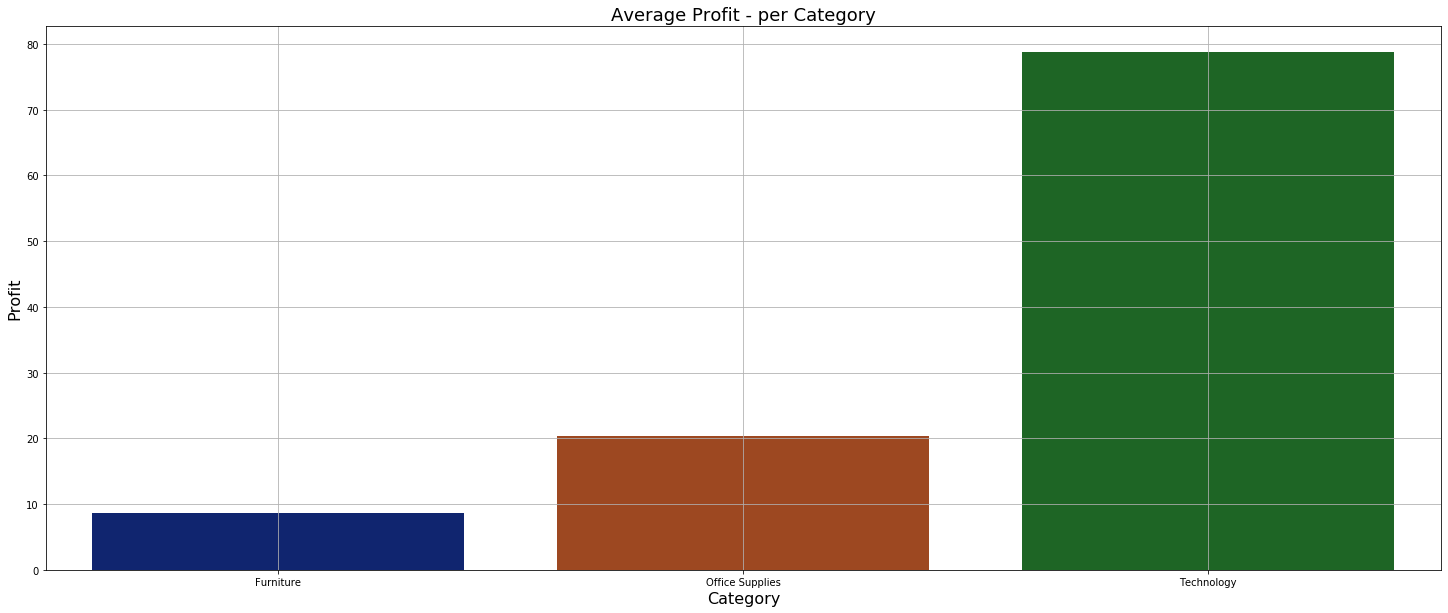

In [44]:
avg_bar('Category')

C:\jupyternotebook\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


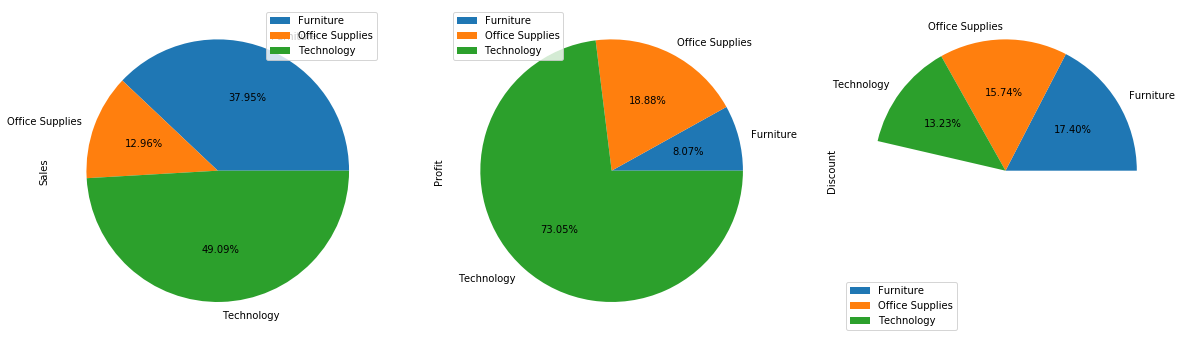

In [45]:
pie_percentage('Category')

1. Sales and Profit are highest in Technology.
2. Profit is least in furniture but discount is highest.
3.  Sales is least in Office Suplies and discount is least in technology.

## 6. BY Sub-Category

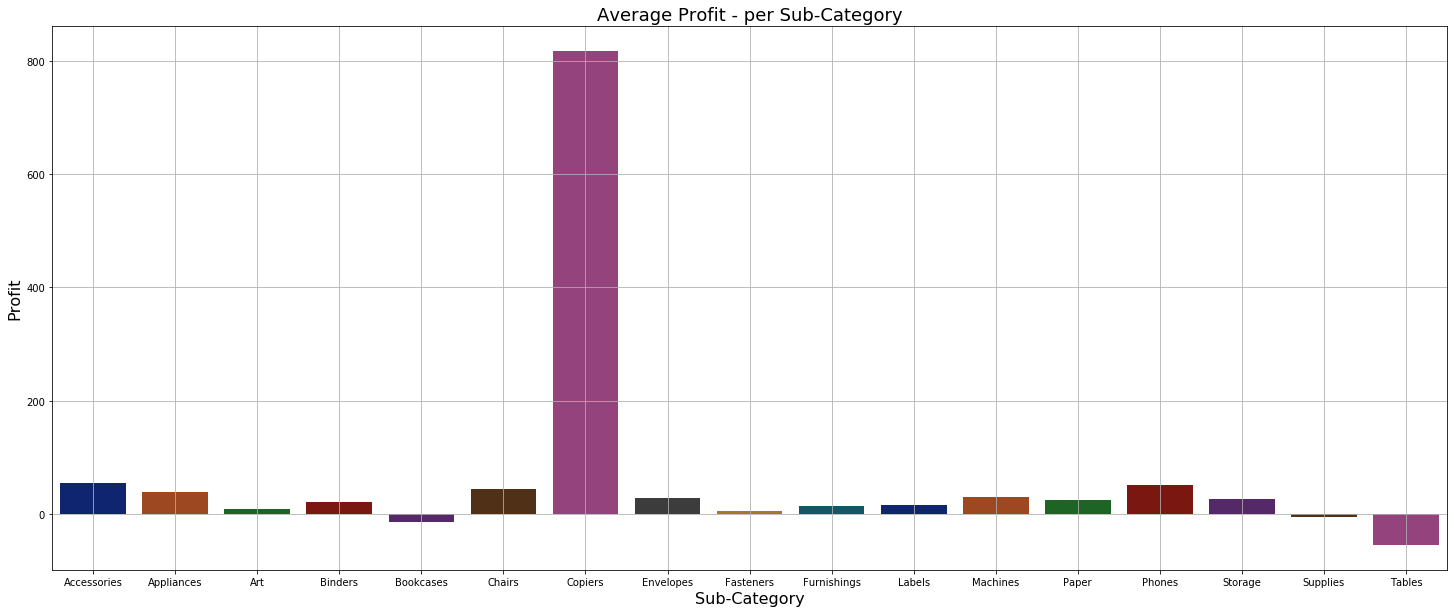

In [46]:
avg_bar('Sub-Category')

Tables have lowest profit and copiers have highest profit.

C:\jupyternotebook\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AFED18F648>,
      dtype=object)

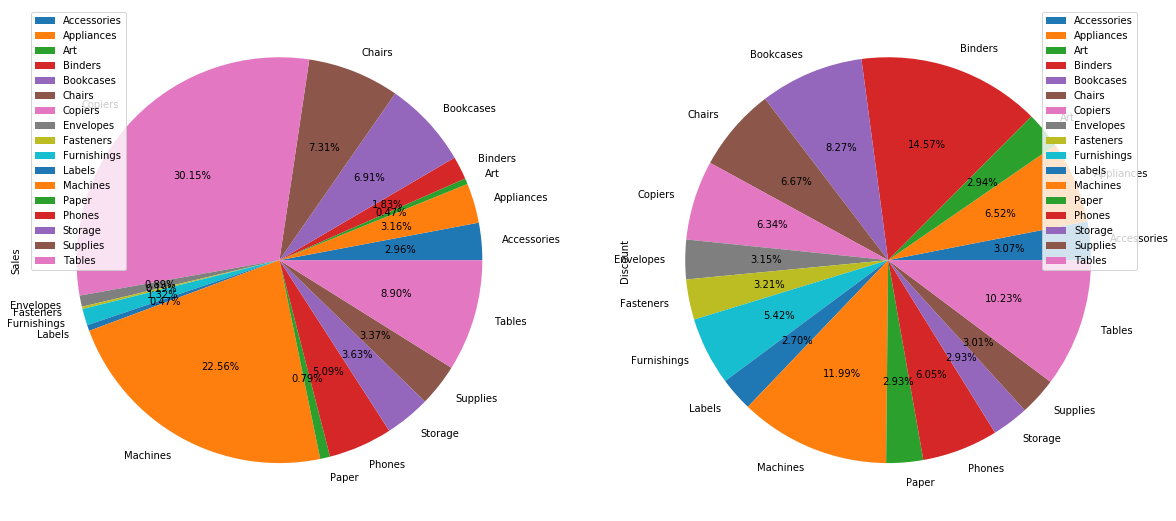

In [47]:
df3 = df.groupby(['Sub-Category'])['Sales', 'Discount'].mean()
df3.plot.pie(subplots=True, labels = df3.index, autopct='%1.2f%%',figsize = (20,20))

## 7. By Quantity

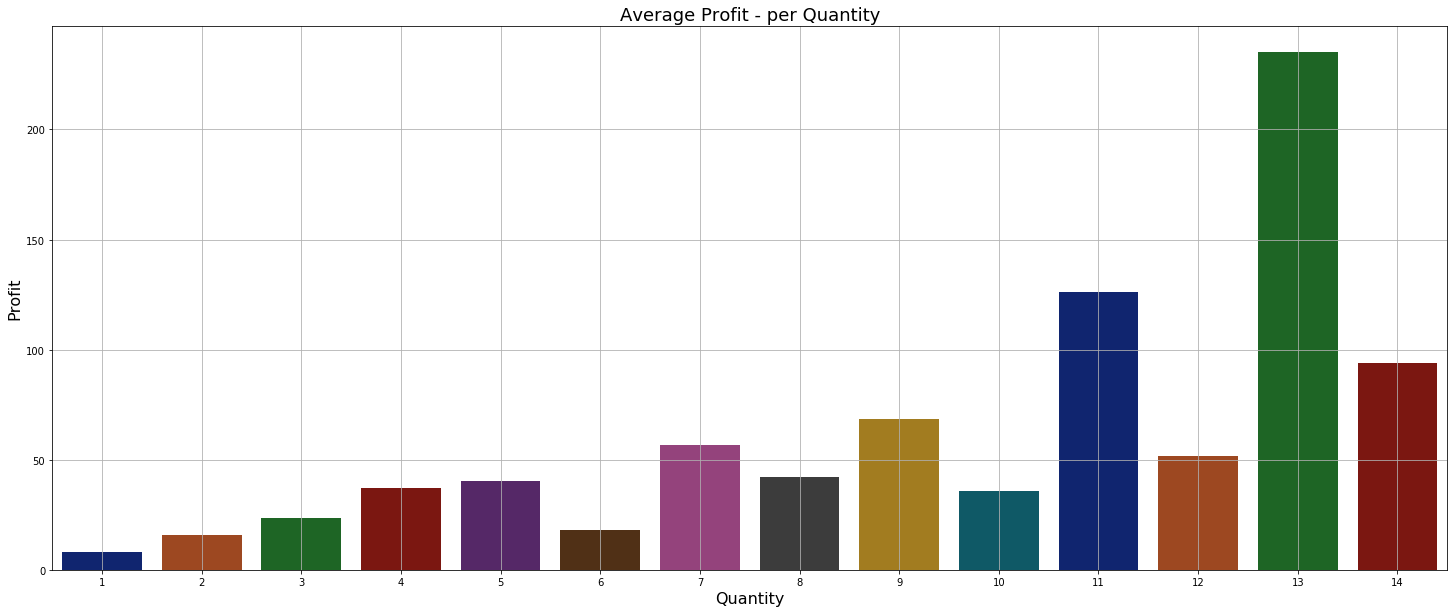

In [48]:
avg_bar('Quantity')

## 8. By Discount

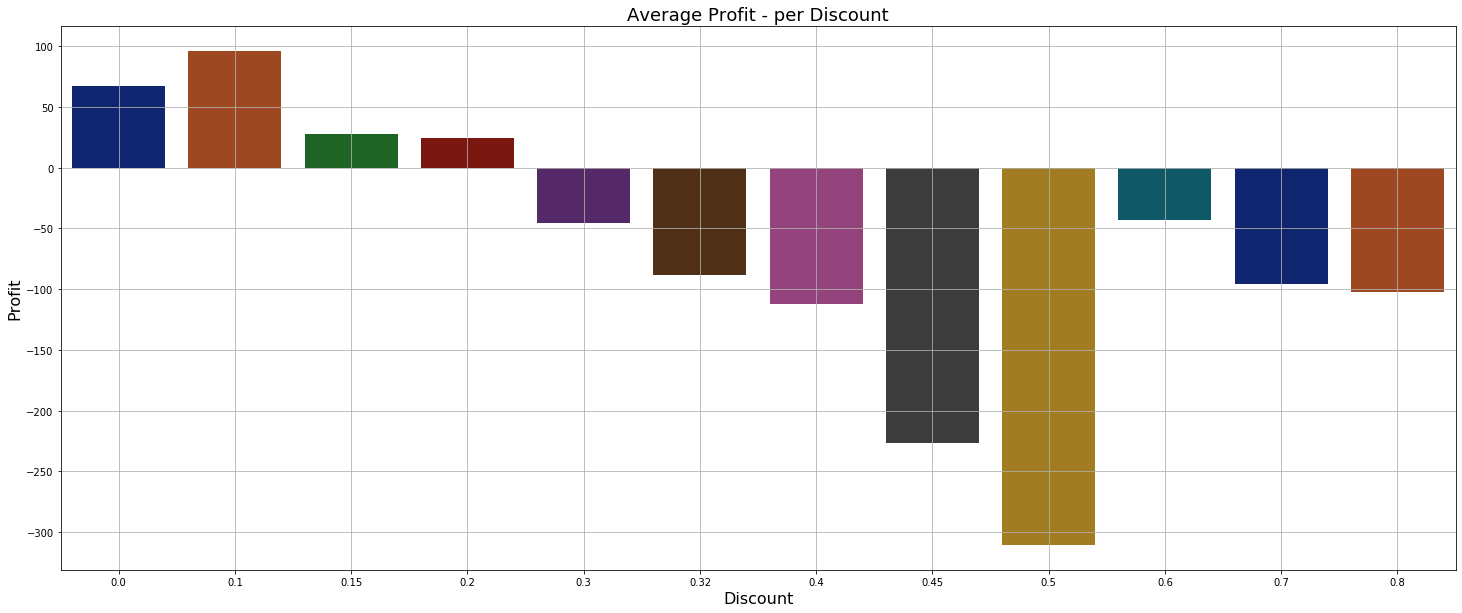

In [49]:
avg_bar('Discount')

## Looking out for weak Areas

## 1. BY Region

In [52]:
df5= df.loc[df['Region'] == 'Central']
df5

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
16,Standard Class,Consumer,United States,Madison,Wisconsin,53711,Central,Office Supplies,Storage,665.8800,6,0.00,13.3176
21,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Art,19.4600,7,0.00,5.0596
22,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Appliances,60.3400,7,0.00,15.6884
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961,First Class,Home Office,United States,Houston,Texas,77041,Central,Office Supplies,Paper,65.5840,2,0.20,23.7742
9962,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
9972,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Envelopes,99.5680,2,0.20,33.6042
9982,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Office Supplies,Paper,35.5600,7,0.00,16.7132


In [54]:
df6 = df5.groupby('State')[['Sales','Discount', 'Profit']].mean()
df6 = df6.sort_values('Profit', ascending=False)
df6

,Sales,Discount,Profit
State,,,
Indiana,359.431946,0.000000,123.375411
Minnesota,335.541011,0.000000,121.608847
Missouri,336.441667,0.000000,97.518341
Michigan,298.738756,0.007087,96.173584
Wisconsin,291.951000,0.000000,76.380004
Oklahoma,298.233182,0.000000,73.544788
Nebraska,196.445526,0.000000,53.607742
Iowa,152.658667,0.000000,39.460397
Kansas,121.429583,0.000000,34.851813


In [55]:
df7 = df5.groupby('Category')[['Sales','Discount', 'Profit']].mean()
df7 = df7.sort_values('Profit', ascending=False)
df7

,Sales,Discount,Profit
Category,,,
Technology,405.753124,0.133095,80.231981
Office Supplies,117.659864,0.252431,6.247068
Furniture,340.431654,0.298000,-6.054472


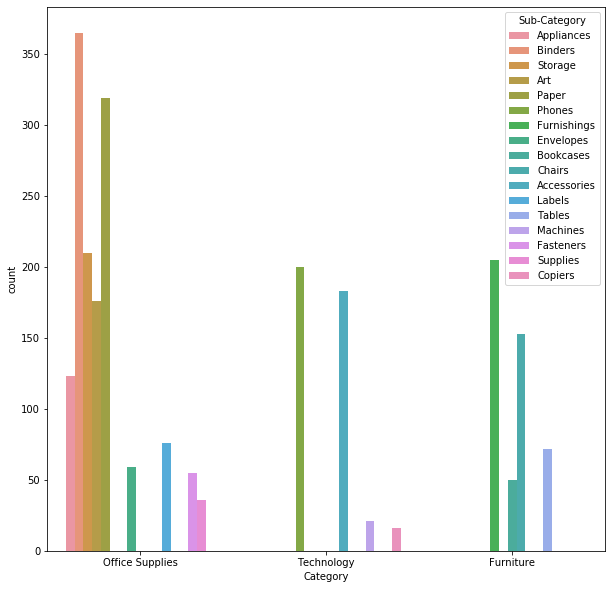

In [60]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Category", hue="Sub-Category",ax=ax, data=df5)

In [86]:
df9 = df5.groupby('Sub-Category')[['Sales','Discount', 'Profit']].mean()
df9 = df9.sort_values('Profit', ascending=False)
df9

,Sales,Discount,Profit
Sub-Category,,,
Copiers,2328.723125,0.112500,975.552581
Phones,362.016410,0.122000,61.615134
Chairs,554.514222,0.194118,42.860293
Accessories,185.552328,0.124590,39.626397
Envelopes,78.591051,0.128814,30.127598
Paper,54.634476,0.128527,21.787691
Labels,32.256211,0.113158,14.119466
Storage,218.714819,0.123810,9.380174
Art,32.757614,0.122727,6.790677


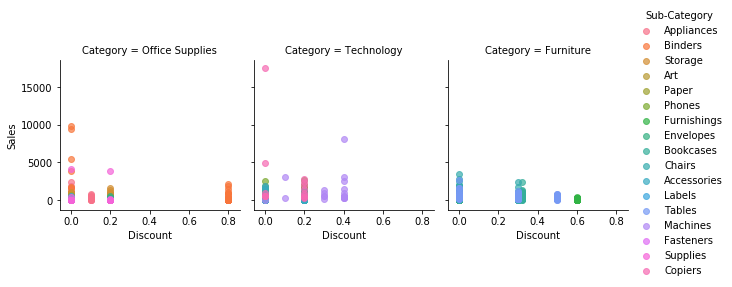

In [61]:
g = sns.FacetGrid(df5, hue="Sub-Category",col="Category")
g.map(plt.scatter, "Discount", "Sales", alpha=.7)
g.add_legend();

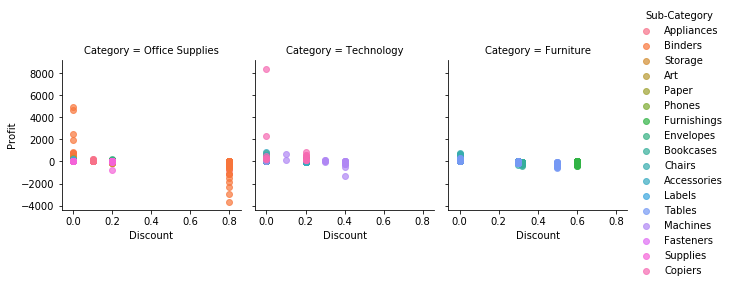

In [62]:
g = sns.FacetGrid(df5, hue="Sub-Category",col="Category")
g.map(plt.scatter, "Discount", "Profit", alpha=.7)
g.add_legend();

## Selecting rows where loss has occurred in Central Region

In [69]:
df8= df5.loc[df['Profit'] <0]
df8

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
36,First Class,Corporate,United States,Richardson,Texas,75080,Central,Furniture,Furnishings,190.9200,5,0.60,-147.9630
38,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
39,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Chairs,212.0580,3,0.30,-15.1470
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844,First Class,Consumer,United States,Decatur,Illinois,62521,Central,Furniture,Furnishings,61.5440,7,0.60,-40.0036
9903,Standard Class,Consumer,United States,Carrollton,Texas,75007,Central,Furniture,Furnishings,25.1280,3,0.60,-6.9102
9919,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Furniture,Chairs,528.4300,5,0.30,-143.4310
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176


In [112]:
df8['State'].value_counts()

Texas       486
Illinois    254
Name: State, dtype: int64

In [72]:
df8['Profit'].sum()

-56308.648

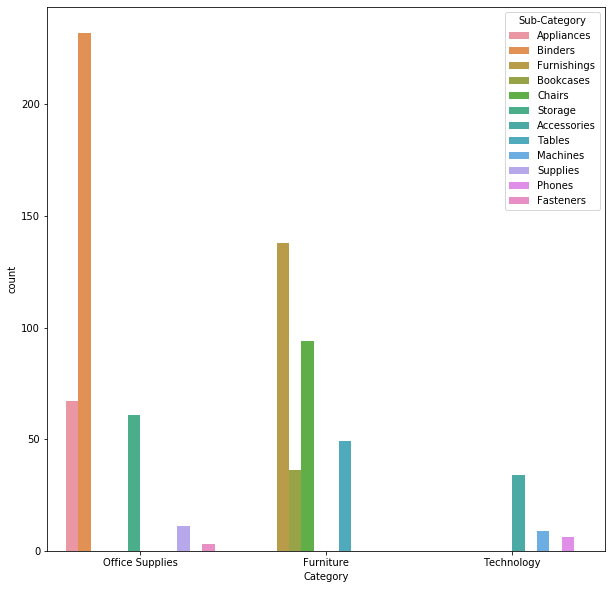

In [83]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Category", hue="Sub-Category",ax=ax, data=df8)

In [84]:
df10 = df8.groupby('Sub-Category')[['Sales','Discount', 'Profit']].sum()
df10 = df10.sort_values('Profit', ascending=False)
df10

,Sales,Discount,Profit
Sub-Category,,,
Fasteners,39.9600,0.60,-8.6613
Phones,643.5760,1.20,-132.5407
Accessories,3368.4000,6.80,-239.6935
Supplies,4304.6640,2.20,-860.2812
Storage,11764.1280,12.20,-2076.1838
Machines,18919.6740,3.50,-2904.1200
Bookcases,18577.4128,11.34,-2947.0103
Chairs,38791.8720,28.20,-4094.3445
Furnishings,6644.7000,82.80,-5944.6552


In [87]:
df10 = df8.groupby('Sub-Category')[['Sales','Discount', 'Profit']].mean()
df10 = df10.sort_values('Profit', ascending=False)
df10

,Sales,Discount,Profit
Sub-Category,,,
Fasteners,13.320000,0.200000,-2.887100
Accessories,99.070588,0.200000,-7.049809
Phones,107.262667,0.200000,-22.090117
Storage,192.854557,0.200000,-34.035800
Furnishings,48.150000,0.600000,-43.077212
Chairs,412.679489,0.300000,-43.556856
Supplies,391.333091,0.200000,-78.207382
Bookcases,516.039244,0.315000,-81.861397
Binders,58.524388,0.800000,-94.410177


### In Central Region,
1. Texas has least Profit while Illinios second to least.
2. Furniture has least profit.
3. Binders are ordered the most followed by Paper.
4. Sales and Profit for Copiers is the most.
5. Machines have least profit with discount of 40%.
6. Binders also have low profit but there are some instances where they have gained profit.
6. Total loss is 56308.648

#### In Texas and Illinios,
1. Binders are ordered the most, so loss occurred by them is highest.
2. Total loss occurred by binders is 21903.161
3. Machines have lowest Profit.

## 2. By State

#### Analysing States with negative average Profit

In [92]:
df11=df.loc[df['State'].isin(['Ohio', 'Colorado','North Carolina','Tennessee','Pennsylvania','Texas','Illinois','Arizona','Oregon','Florida'])]

In [93]:
df11

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
12,Standard Class,Consumer,United States,Concord,North Carolina,28027,South,Office Supplies,Paper,15.5520,3,0.20,5.4432
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
9963,Same Day,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Paper,10.3680,2,0.20,3.6288
9972,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Envelopes,99.5680,2,0.20,33.6042
9981,First Class,Consumer,United States,Fairfield,Ohio,45014,East,Office Supplies,Labels,16.5200,5,0.20,5.3690


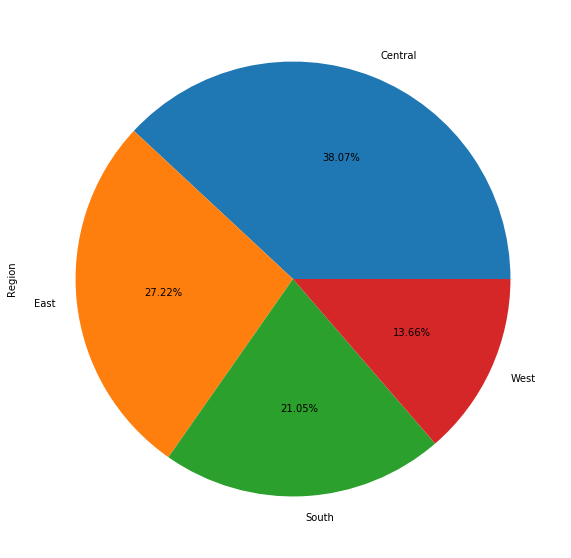

In [106]:
df11['Region'].value_counts().plot.pie(autopct='%1.2f%%',figsize = (10,10))

In [94]:
df12 = df11.groupby('State')[['Sales','Discount', 'Profit']].mean()
df12 = df12.sort_values('Profit', ascending=False)
df12

,Sales,Discount,Profit
State,,,
Florida,233.612815,0.299347,-8.875461
Oregon,141.632374,0.289431,-9.708124
Arizona,157.508933,0.303571,-15.303235
Illinois,163.263823,0.389206,-25.665275
Texas,173.066675,0.370539,-26.196321
Pennsylvania,198.799253,0.328840,-26.562122
Tennessee,167.551219,0.291257,-29.189583
North Carolina,223.305880,0.283534,-30.083985
Colorado,176.418231,0.316484,-35.867351


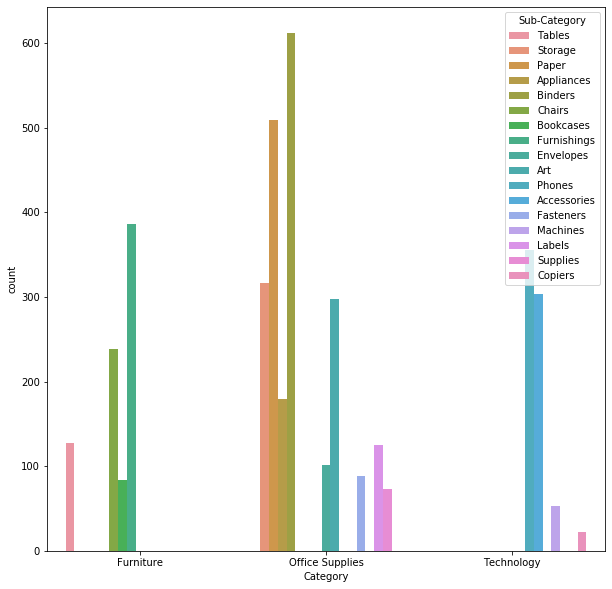

In [95]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Category", hue="Sub-Category",ax=ax, data=df11)

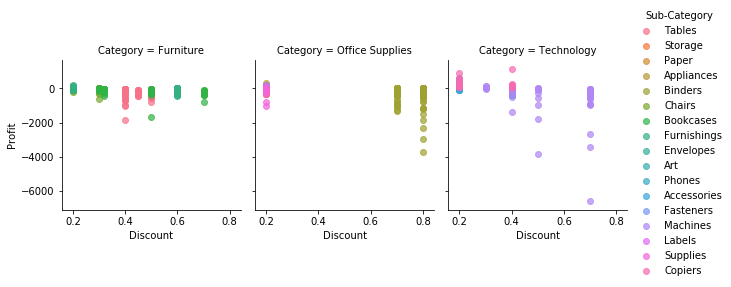

In [96]:
g = sns.FacetGrid(df11, hue="Sub-Category",col="Category")
g.map(plt.scatter, "Discount", "Profit", alpha=.7)
g.add_legend();

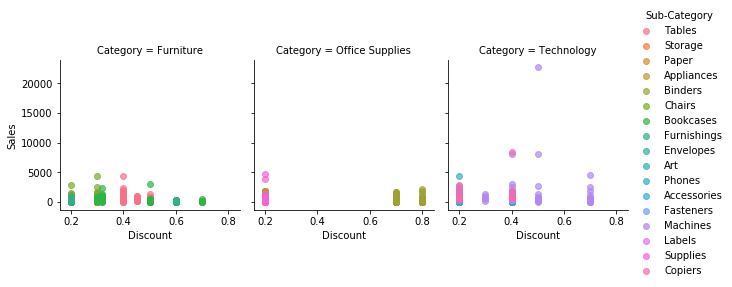

In [97]:
g = sns.FacetGrid(df11, hue="Sub-Category",col="Category")
g.map(plt.scatter, "Discount", "Sales", alpha=.7)
g.add_legend();

In [107]:
df13 = df11.groupby('Sub-Category')[['Sales','Discount', 'Profit']].sum()
df13 = df13.sort_values('Profit', ascending=False)
df13

,Sales,Discount,Profit
Sub-Category,,,
Paper,25231.9120,101.80,8693.4026
Accessories,49010.0080,60.80,6647.3818
Copiers,31319.4900,6.20,6331.8881
Phones,124207.7600,92.80,2629.7163
Envelopes,5869.9520,20.40,1987.1923
Art,9104.1520,59.60,1147.1864
Labels,3246.7520,25.00,1124.1580
Fasteners,1201.4400,17.80,297.3130
Supplies,15114.3280,14.60,-2907.4937


In [110]:
df14 = df11.groupby('Sub-Category')[['Sales','Discount', 'Profit']].mean()
df14 = df14.sort_values('Profit', ascending=False)
df14

,Sales,Discount,Profit
Sub-Category,,,
Copiers,1423.613182,0.281818,287.813095
Accessories,161.217132,0.200000,21.866388
Envelopes,57.548549,0.200000,19.482277
Paper,49.571536,0.200000,17.079376
Labels,25.974016,0.200000,8.993264
Phones,349.881014,0.261408,7.407652
Art,30.550846,0.200000,3.849619
Fasteners,13.499326,0.200000,3.340596
Furnishings,78.381772,0.343005,-9.815610


1. Binders are ordered the most, so loss occurred by them is highest.
2. Total loss occurred by binders is 38504
3. Machines have lowest Profit.